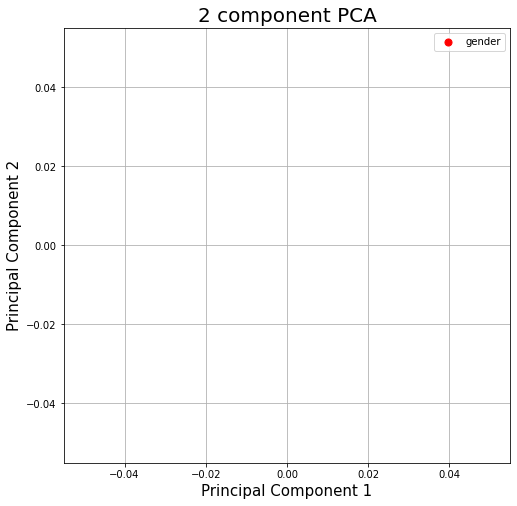

[[-1.02890499  0.3552126 ]
 [ 1.07003105 -1.22844289]
 [ 1.18384908  0.78602862]
 [-1.51599091 -1.44962291]
 [ 0.56397564 -0.1296351 ]]


[[[ 0.14381798 -0.17423484]
  [-0.17423484  0.73438483]]

 [[ 0.86489821 -0.00555801]
  [-0.00555801  0.10260097]]

 [[ 0.23412971 -0.17214204]
  [-0.17214204  0.71627246]]

 [[ 0.08549914 -0.02223705]
  [-0.02223705  0.07238539]]

 [[ 0.24514872 -0.10638225]
  [-0.10638225  0.19611503]]]


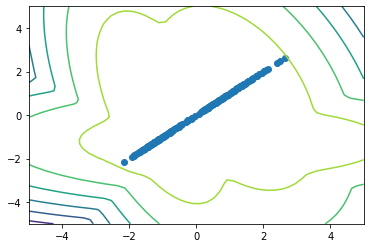

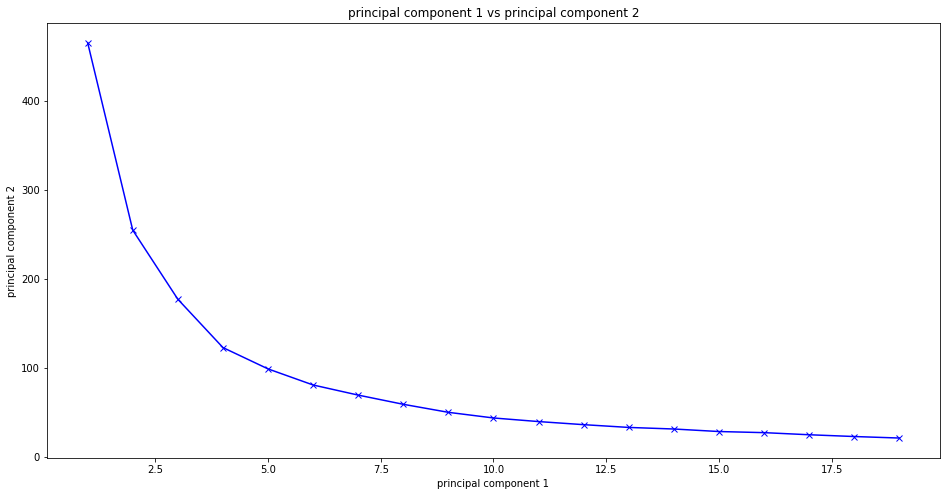

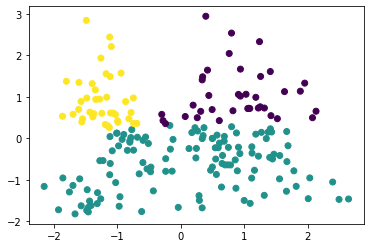

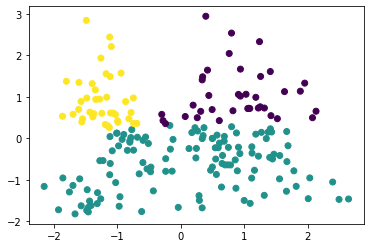

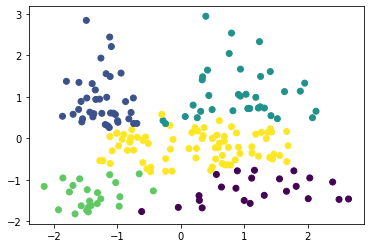

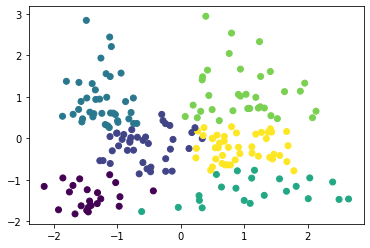

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Mall_Customers.csv")
data.head()

data.columns=['id', 'gender','age', 'income', 'spending']

# Changing sex attribute as male to 1 and Female to 0
dictionary = {'Male':1, 'Female':0}
data.gender=[dictionary[item] for item in data.gender]
del data['id']

from sklearn.preprocessing import StandardScaler
features = ['age', 'income', 'spending']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['gender']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

finalDf = pd.concat([principalDf, data['gender']], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['gender']
colors = ['r']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gender'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

#Appltying GMM here
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
gmm.fit(principalDf)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-5, 5), np.linspace(-5,5))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(principalDf['principal_component_1'], principalDf['principal_component_1'])
plt.show()

#Applying K Means
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalDf)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('principal component 1 vs principal component 2')
plt.show()

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data)

data['k_means']=kmeanModel.predict(data)
plt.scatter(principalDf.principal_component_1, principalDf.principal_component_2,c=data['k_means'])
plt.show()

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data)
data['k_means']=kmeanModel.predict(data)
plt.scatter(principalDf.principal_component_1, principalDf.principal_component_2,c=data['k_means'])
plt.show()

kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(data)
data['k_means']=kmeanModel.predict(data)
plt.scatter(principalDf.principal_component_1, principalDf.principal_component_2,c=data['k_means'])
plt.show()

kmeanModel = KMeans(n_clusters=6)
kmeanModel.fit(data)
data['k_means']=kmeanModel.predict(data)
plt.scatter(principalDf.principal_component_1, principalDf.principal_component_2,c=data['k_means'])
plt.show()
